In [1]:
from glob import glob
import pandas as pd
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
import itertools
import re
import os
import string
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Activation
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from IPython.display import Image
from math import ceil
import seaborn as sns
from tqdm import tqdm_notebook

In [2]:
import os
import random
import re
import nltk
import time

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.feature_selection import SelectKBest , f_classif
from tqdm import tqdm as t
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from nltk.corpus import stopwords

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from tqdm import tqdm_notebook

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB
import eli5
from scipy.sparse import hstack, vstack

from wordcloud import WordCloud, STOPWORDS
from collections import defaultdict
import plotly.graph_objs as go
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import textblob
import string

Using TensorFlow backend.


In [4]:
print(os.listdir('C:/Users/Neha Maiya/reviews/aclImdb'))#link4

['aclImdb', 'imdb.vocab', 'imdbEr.txt', 'README', 'test', 'train']


In [5]:
PATH = 'C:/Users/Neha Maiya/reviews/aclImdb' #link4

In [6]:
import sys
sys.getdefaultencoding()

'utf-8'

In [7]:

posFiles = [x for x in os.listdir(PATH+"/train/pos/") if x.endswith(".txt")]
negFiles = [x for x in os.listdir(PATH+"/train/neg/") if x.endswith(".txt")]#link 8

# testFiles = [x for x in os.listdir(PATH+"test/") if x.endswith(".txt")]

In [8]:
test_pos_Files= [x for x in os.listdir(PATH+"/test/pos/") if x.endswith(".txt")]
test_neg_Files=[x for x in os.listdir(PATH+"/test/neg/") if x.endswith(".txt")]  #link 8

In [9]:
P_train=[]
N_train=[]

for nfile in negFiles:
    with open(PATH+"/train/neg/"+nfile, encoding="utf-8") as f:
        N_train.append(f.read())
for pfile in posFiles:
    with open(PATH+"/train/pos/"+pfile, encoding="utf-8") as f:
        P_train.append(f.read())
        #link 8


In [10]:
P_test=[]
N_test=[]
for ptestfile in test_pos_Files:
    with open(PATH+"/test/pos/"+ptestfile, encoding="utf-8") as f:
        P_test.append(f.read())
for ntestfile in test_neg_Files:
    with open(PATH+"/test/neg/"+ntestfile, encoding="utf-8") as f:
        N_test.append(f.read())
        #link 8

In [11]:
# change_names = reviews_train.columns.tolist()
# change_names[change_names.index('label')] = 'Sentiment'
# reviews_train.columns = change_names
# reviews_train.head()

In [12]:
reviews_train = pd.concat([
    pd.DataFrame({"review":P_train, "Label":1, "file":posFiles}),
    pd.DataFrame({"review":N_train, "Label":-1, "file":negFiles})
], ignore_index=True).sample(frac=1, random_state=1)
reviews_train.head()


,review,Label,file
21492,"I have copy of this on VHS, I think they (The ...",-1,6844_1.txt
9488,After several extremely well ratings to the po...,1,7290_10.txt
16933,I still don't know why I forced myself to sit ...,-1,2740_1.txt
12604,Mt little sister and I are self-proclaimed hor...,-1,10094_1.txt
8222,I have personally seen many Disney movies in m...,1,6150_7.txt


In [13]:
# change_names_test = reviews_test.columns.tolist()
# change_names_test[change_names_test.index('Sentiment')] = 'Sentiment_Test'
# reviews_test.columns = change_names_test

In [14]:
    reviews_test = pd.concat([
    pd.DataFrame({"review":P_test, "Label":2, "file":test_pos_Files}),
    pd.DataFrame({"review":N_test, "Label":-2,"file":test_neg_Files})
], ignore_index=True).sample(frac=1, random_state=1)
reviews_test.head()

,review,Label,file
21492,A movie theater with a bad history of past gru...,-2,6844_2.txt
9488,"""Here On Earth"" is a surprising beautiful roma...",2,7290_10.txt
16933,I just watched Descent. Gawds what an awful mo...,-2,2740_3.txt
12604,In a nutshell the movie is about a gang war in...,-2,10094_4.txt
8222,"Instead of watching the recycled history of ""P...",2,6150_7.txt


In [15]:
reviews_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 21492 to 235
Data columns (total 3 columns):
review    25000 non-null object
Label     25000 non-null int64
file      25000 non-null object
dtypes: int64(1), object(2)
memory usage: 781.2+ KB


In [16]:
reviews_train.describe()

,Label
count,25000.00000
mean,0.00000
std,1.00002
min,-1.00000
25%,-1.00000
50%,0.00000
75%,1.00000
max,1.00000


In [17]:
reviews_train.shape

(25000, 3)

In [18]:
reviews_train['Label'].unique()

array([-1,  1], dtype=int64)

In [19]:
reviews_train['review'].unique()

array(["I have copy of this on VHS, I think they (The television networks) should play this every year for the next twenty years. So that we don't forget what was and that we remember not to do the same mistakes again. Like putting some people in the director's chair, where they don't belong. This movie Rappin' is like a vaudevillian musical, for those who can't sing, or act. This movie is as much fun as trying to teach the 'blind' to drive a city bus.<br /><br />John Hood, (Peebles) has just got out of prison and he's headed back to the old neighborhood. In serving time for an all-to-nice crime of necessity, of course. John heads back onto the old street and is greeted by kids dogs old ladies and his peer homeys as they dance and sing all along the way.<br /><br />I would recommend this if I was sentimental, or if in truth someone was smoking medicinal pot prescribed by a doctor for glaucoma. Either way this is a poorly directed, scripted, acted and even produced (I never thought I'd 

In [20]:
reviews_train['Label'].value_counts()

-1    12500
 1    12500
Name: Label, dtype: int64

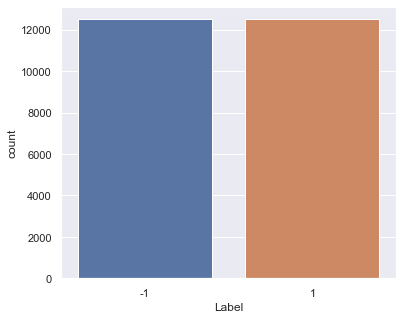

In [21]:
sns.set(rc={'figure.figsize':(6,5)})
sns.countplot(reviews_train['Label'])

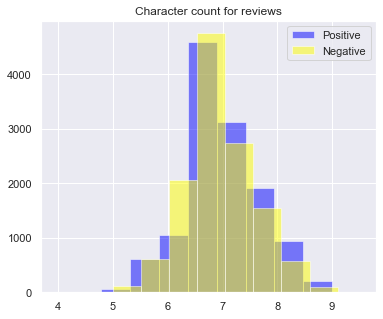

In [22]:
#character count link 4
reviews_train[reviews_train['Label']==1]['review'].apply(lambda y: np.log1p(len(y))).hist(alpha=0.5, color='blue', label='Positive')
reviews_train[reviews_train['Label']==-1]['review'].apply(lambda y: np.log1p(len(y))).hist(alpha=0.5, color='yellow', label='Negative')
plt.title('Character count for reviews')
plt.legend();
# alpha is for the darkness of color

In [23]:
reviews_test.shape

(25000, 3)

In [24]:
reviews_test['Label'].unique()

array([-2,  2], dtype=int64)

In [25]:
from bs4 import BeautifulSoup
# dataset.review = dataset.review.apply(lambda r: BeautifulSoup(r, 'html.parser').get_text())

In [26]:
import spacy
import en_core_web_sm
from spacy.lang.en import English
en_core_web_sm.load()
from  spacy.lang.en.stop_words import STOP_WORDS
from nltk.corpus import stopwords
import string

In [58]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,HashingVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline


import html as ihtml
import re

In [28]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize

In [29]:
stopWords = stopwords.words('english')

In [30]:
stemmer = PorterStemmer()

In [31]:
snowballstemmer = SnowballStemmer('english')

In [32]:
lemmatizer = WordNetLemmatizer()


In [33]:
reviews_train.iloc[1]

review    After several extremely well ratings to the po...
Label                                                     1
file                                            7290_10.txt
Name: 9488, dtype: object

In [34]:
from gensim.parsing.preprocessing import remove_stopwords
from gensim.parsing.preprocessing import strip_punctuation
from gensim.parsing.preprocessing import strip_tags
from gensim.parsing.preprocessing import strip_multiple_whitespaces

In [35]:
def rmvhtmltags(text):
    remreg = re.compile('<.*?>')
    cleartext = re.sub(remreg, '', text)
    return text
# Function to remove URLs starting with https/http 
def remove_urls (vTEXT):
    vTEXT = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', vTEXT, flags=re.MULTILINE)
    return(vTEXT)

def rmvspclcharacter(text):

    #convert to lowercase and ignore special charcter
    clearspcl = re.sub(r'[^A-Za-z0-9\s.]', r'', str(text).lower())
    clearspcl = re.sub(r'\n', r' ', text)
    
    
    clearspcl = " ".join([word for word in text.split() if word not in stopWords])
    
#     clearspcl


#     print(' '.join(stemming_texts))
    return text
    

In [36]:
# def stemming_text(text):
#     processed_positive_words_list=[]
#     for i in reviews_train.index:
#         stemmedwords = []
#         for words in word_tokenize(text):
#             if len(words) > 1 and words not in stopWords:
#                 stemmedwords.append(snowballstemmer.stem(words))
#         if reviews_train.iloc[i]['Label'] == 1:
#             processed_positive_words_list+=(stemmedwords)
    


    

In [38]:
def unique_list(l):
    ulist = []
    [ulist.append(x) for x in l if x not in ulist]
    return ulist
    

In [40]:



def dataprocessing(x):
    x = rmvhtmltags(x)
    x = remove_urls(x)

    x = x.lower()
    x = rmvspclcharacter(x)
#     x = stemmer_1(x)
    x = remove_stopwords(x)
    x = strip_punctuation(x)
    x = strip_multiple_whitespaces(x)
    
    x=' '.join([re.sub(r'\d+', '',i) for i in word_tokenize(x)])
#     x = stemming(x)
    x = ' '.join(unique_list(x.split()))
    return x










    

In [41]:
reviews_train['review'] = reviews_train['review'].map(lambda x: dataprocessing(x))

In [42]:
reviews_train['review'][7]

'critically acclaimed psychological thriller based true events gabriel robin williams celebrated writer late night talk host captivated harrowing story young listener adoptive mother toni collette troubling questions arise boy s however finds drawn widening mystery hides deadly secret according film official synopsis br you stop reading comments watch now the how lose leg ending ms planning new life chopped off sent deleted scenes land it overkill nature physical mental ailments obvious time mr returns york possibly blindness question revelation certain highway video tape benefit re editing director cut bobby cannavale as jess don t seem initially believable couple scene establishing relationship helped set stage otherwise cast exemplary offers exceptionally strong characterization gay impersonation sandra oh anna joe morton ashe rory culkin pete logand perfect best all donna belongs creepy hall fame correct saying be know like guy psycho years organizations giving acting awards reach 

In [ ]:
create_bow = make_pipeline(
        make_union(
            make_pipeline(
                FunctionTransformer(lambda x: x['parsed_review'],validate=False),
                CountVectorizer(ngram_range=(1,1))

            ),
            FunctionTransformer(lambda x: x.loc[:,'word_count'].values[:,np.newaxis],validate=False)
        ),

 
        #memory = cachedir,

)

create_bow_pre = make_column_transformer(
    (create_bow,'review')
)

In [43]:
# def lemmatizarion(text):
#     text = nlp(text)
#     text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
#     return text